In [2]:
    #IMport The Librarys
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
#Import the Dataset

df = pd.read_csv("diabetes.csv")
print("\nDataset Values.\n")
df.head()


Dataset Values.



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Find the Shape of the Dataset
print(f"Total Columns of the Data set is {df.shape[1]} and the Rows is {df.shape[0]}")

Total Columns of the Data set is 9 and the Rows is 768


In [8]:
#Describe the Dataset
print("\nLest see the Describe Values of the Datasets\n")
df.describe()


Lest see the Describe Values of the Datasets



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Check the Datatpes of the Dataset columns
print("\nLets see all the columns Data types\n")
df.dtypes


Lets see all the columns Data types



Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
#Check any null values present or not.
print("\nLets see the Null values of this datasets\n")
df.isnull().sum()


Lets see the Null values of this datasets



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#Give the Input Data and Output Dta
x = df.iloc[:,:-1]
y = df["Outcome"]

In [15]:
#Train Test And Split Functions

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
#Scal Down all the Fetures
std = StandardScaler()
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

In [21]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

y_predict = model.predict(x_test_scaled)

In [22]:
#Model Evaluation

print("\nModel Accuracy:\n",accuracy_score(y_test,y_predict))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_predict))
print("\nClassification Report:\n",classification_report(y_test,y_predict))


Model Accuracy:
 0.7532467532467533

Confusion Matrix:
 [[79 20]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



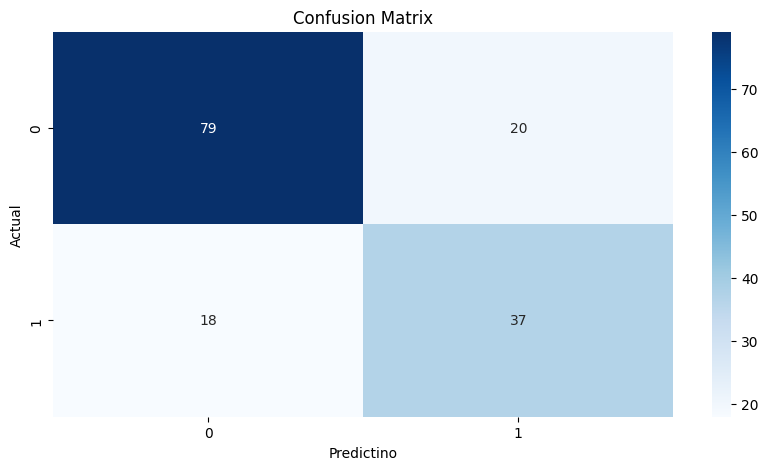

In [29]:
#Confustion Matrix Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predictino")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix.png",dpi=500,bbox_inches='tight')
plt.show()

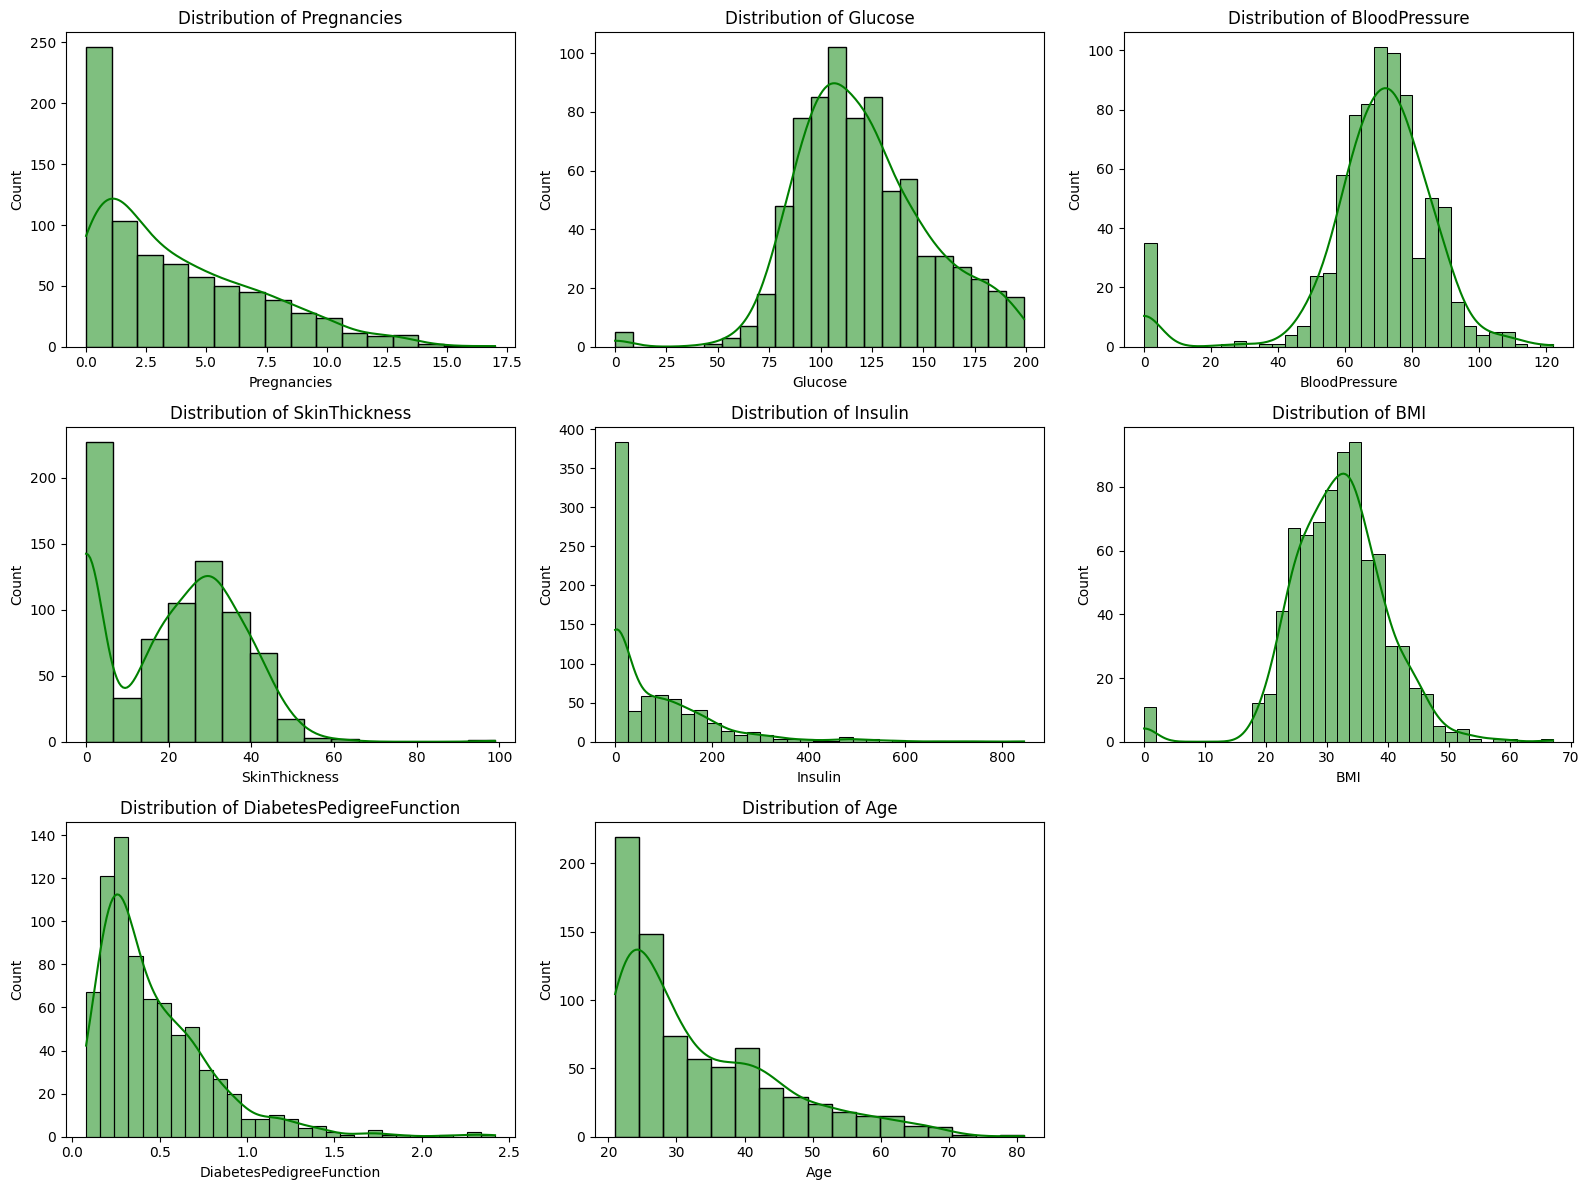

In [42]:
#Distribution plots for each feature

plt.figure(figsize=(16, 12))
for i,column in enumerate(x.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True,color='green',edgecolor='black')
    plt.title(f"Distribution of {column}",fontsize=12)
plt.tight_layout()
plt.savefig("Distribution_plots_for_each_feature.png",dpi=500,bbox_inches='tight')
plt.show()

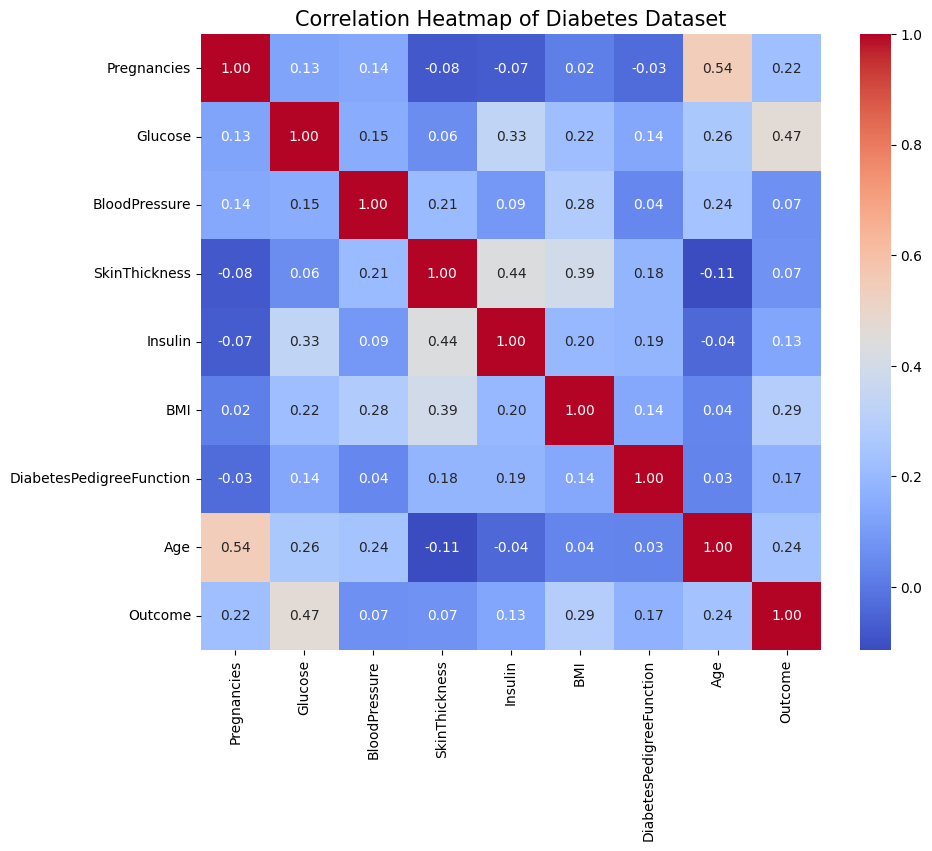

In [44]:
#Correlation Heatmap of Diabetes Dataset

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Diabetes Dataset", fontsize=15)
plt.savefig("Correlation_Heatmap_of_Diabetes_Dataset.png",dpi=500,bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6780\3857972866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="pastel")


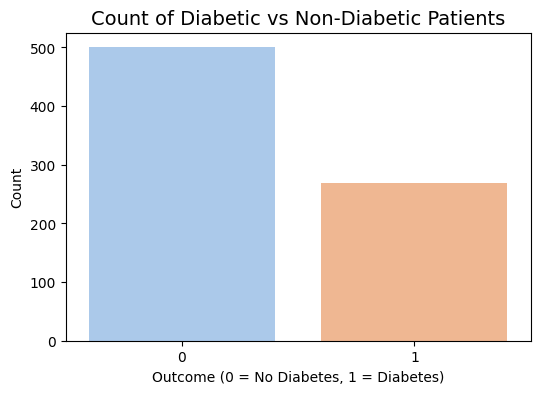

In [45]:
#Count of Diabetic vs Non-Diabetic Patients

plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=df, palette="pastel")
plt.title("Count of Diabetic vs Non-Diabetic Patients", fontsize=14)
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.savefig("Count_of_Diabetic_vs_Non-Diabetic_Patients.png",dpi=500,bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6780\3937591578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=df, palette="Set2")


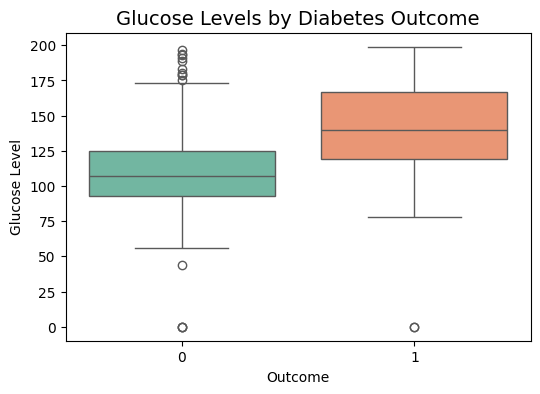

In [46]:
#Glucose Levels by Diabetes Outcome

plt.figure(figsize=(6, 4))
sns.boxplot(x="Outcome", y="Glucose", data=df, palette="Set2")
plt.title("Glucose Levels by Diabetes Outcome", fontsize=14)
plt.xlabel("Outcome")
plt.ylabel("Glucose Level")
plt.savefig("Glucose_Levels_by_Diabetes_Outcome.png",dpi=500,bbox_inches='tight')
plt.show()

In [30]:

print("\n Enter Your Helth Data:\n")

Pregnancies = int(input("Enter the Pregnancies(like 8):"))
Glucose = int(input("Enter the Glucose(like 130):"))
BloodPressure = int(input("Enter the BloodPressure(like 50 to 90):"))
SkinThickness = int(input("Enter the SkinThickness(like 20 to 40):"))
Insulin = int(input("Enter the Insulin(like 0 to 200):"))
BMI = int(input("Enter the BMI(like 20 to 60):"))
DiabetesPedigreeFunction = float(input("Enter the DiabetesPedigreeFunction(like 0.00 to 5):"))
Age = int(input("Enter the Age:"))

output = model.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])

if output == 1:
    print("You have a risk of Diabetes.")
else:
    print("You don't have Diabetes.")


 Enter Your Helth Data:



Enter the Pregnancies(like 8): 5
Enter the Glucose(like 130): 120
Enter the BloodPressure(like 50 to 90): 60
Enter the SkinThickness(like 20 to 40): 26
Enter the Insulin(like 0 to 200): 138
Enter the BMI(like 20 to 60): 50
Enter the DiabetesPedigreeFunction(like 0.00 to 5): 3.28
Enter the Age: 21


You have a risk of Diabetes.
